In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d

from create_structures import create_structures
from load_structures import load_structures
from read_spectrum_curve import read_spectrum_curve, to_integrated_mol_absorptivity
from find_function_max import find_function_max

In [113]:
structure_list = ['benzene', 'acetone']
create_structures(structure_list)
structs = load_structures(structure_list)
struct_name='benzene'

# for fg in structs[struct_name].fg_assigned_matrix.columns:
#     print(fg)
#     print(structs[struct_name].get_report(fg, corrected=True))
#


New structures have been successfully created!
Structure(s) benzene acetone have been successfully loaded!


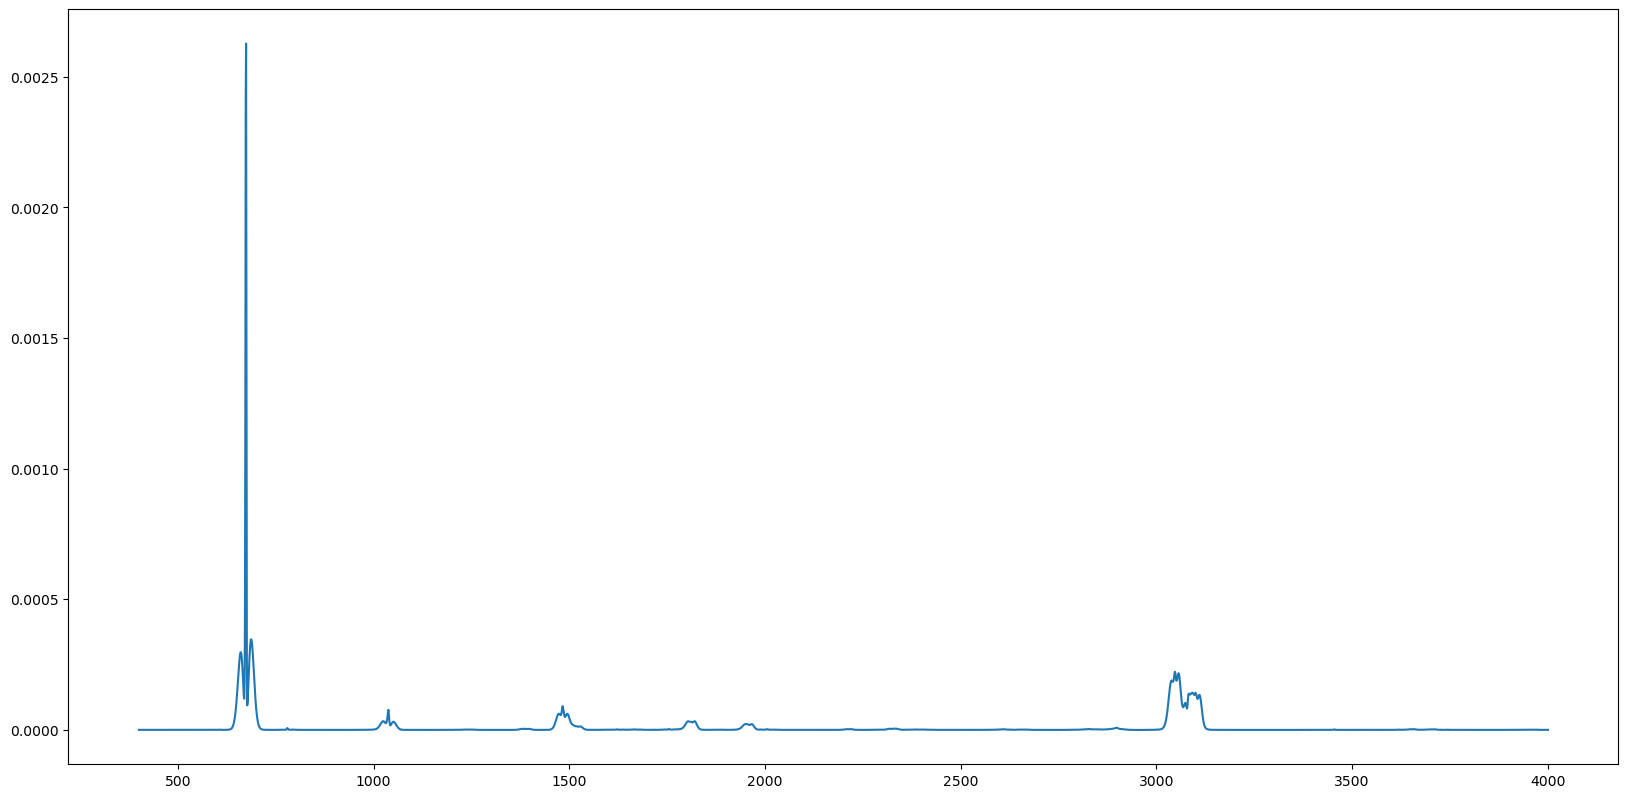

In [116]:
%matplotlib inline
plt.figure(figsize=(20, 10), dpi=100)
data = read_spectrum_curve(struct_name + '.CSV', norm=False)
plt.plot(data.x, data.y * intensity_correction_coefficient,
         label='expiremental IR spectrum of '+ struct_name + ' ' + str(intensity_correction_coefficient))

C:\Users\lisav\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\scipy\opt

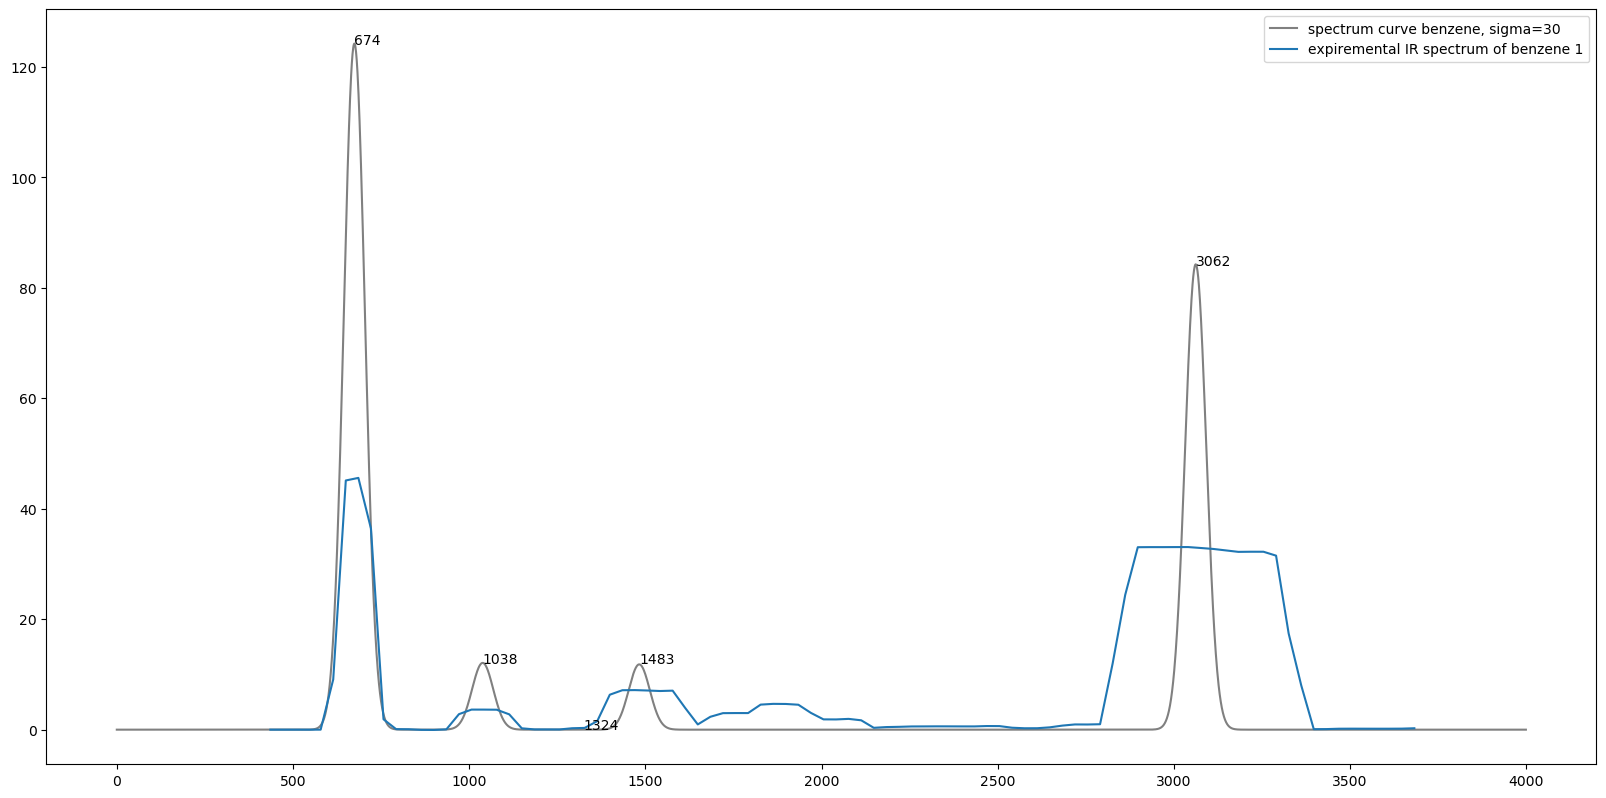

In [99]:
plt.figure(figsize=(20, 10), dpi=100)
structs[struct_name].pm.spectrum_curve(sigma=30, annotate=True)

data = to_integrated_mol_absorptivity(read_spectrum_curve(struct_name + '.CSV', norm=False))
intensity_correction_coefficient = 1
plt.plot(data.x, data.y * intensity_correction_coefficient,
         label='expiremental IR spectrum of '+ struct_name + ' ' + str(intensity_correction_coefficient))

plt.legend()
plt.show()

In [73]:
# spectrum_function = interp1d(data.x, data.y)

In [74]:
# theor_max_table = find_function_max(func, points=structs[struct_name].freqs, bounds=(900, 3500))
# theor_max_table = theor_max_table[theor_max_table.peak_position > 900]
# theor_max_table = theor_max_table[theor_max_table.peak_position < 3500]
# theor_max_table.head()

C:\Users\lisav\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\scipy\opt

,calc_freq,peak_position,intencity
0,3071.348774,2991.0,28.0
1,3062.100290,2991.0,28.0
2,3061.707756,2991.0,28.0
3,3047.385052,2991.0,28.0
4,3046.935074,2991.0,28.0


In [75]:
# exp_int = np.array([spectrum_function(freq) for freq in theor_max_table.peak_position.unique()])
# theor_int = np.array([intencity for intencity in theor_max_table.intencity.unique()])
# freqs = np.array([freq for freq in theor_max_table.peak_position.unique()])
# sf = exp_int / np.array(theor_int)

In [76]:
# pd.DataFrame({'freq': freqs, 'theor_int': theor_int, 'exp_int': exp_int, 'sf': sf})

,freq,theor_int,exp_int,sf
0,2991.0,28.0,33.049647,1.180345
1,1369.0,72.0,2.282691,0.031704
2,1457.0,39.0,7.153223,0.183416
3,1212.0,76.0,0.044977,0.000592
4,1099.0,4.0,3.120494,0.780124


In [105]:
def get_int_sf(structure):
    spectrum = to_integrated_mol_absorptivity(read_spectrum_curve(structure.name + '.CSV', norm=False))
    spectrum_function = interp1d(spectrum.x, spectrum.y)
    
    theor_func = structure.pm.get_spectrum_function().calculate
    
    theor_max_table = find_function_max(theor_func, points=structure.freqs, bounds=(900, 3500))
    theor_max_table = theor_max_table[theor_max_table.peak_position > 900]
    theor_max_table = theor_max_table[theor_max_table.peak_position < 3500]    
    exp_int = np.array([spectrum_function(freq) for freq in theor_max_table.peak_position])
    theor_int = np.array([intencity for intencity in theor_max_table.intencity])
    freqs = np.array([freq for freq in theor_max_table.peak_position])
#     sf = exp_int / theor_int
    
    return pd.DataFrame({'freq': freqs, 'theor_int': theor_int, 'exp_int': exp_int, 'sf': exp_int / theor_int})

In [106]:
print('acetone \n', get_int_sf(structs['acetone']), '\n benzene \n', get_int_sf(structs['benzene']))

C:\coding\learning\Python\diplom\read_spectrum_curve.py:67: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  absorptivity.append(quad(spectrum_function, nu1, nu2)[0] * 1e-5)
C:\coding\learning\Python\diplom\read_spectrum_curve.py:67: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  absorptivity.append(quad(spectrum_function, nu1, nu2)[0] * 1e-5)
C:\Users\lisav\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\scipy\opti

acetone 
       freq  theor_int    exp_int        sf
0   2991.0       28.0  21.063180  0.752256
1   2991.0       28.0  21.063180  0.752256
2   2991.0       28.0  21.063180  0.752256
3   2991.0       28.0  21.063180  0.752256
4   2991.0       28.0  21.063180  0.752256
5   2991.0       28.0  21.063180  0.752256
6   1783.0      153.0  63.125361  0.412584
7   1457.0       39.0  41.754204  1.070621
8   1457.0       39.0  41.754204  1.070621
9   1457.0       39.0  41.754204  1.070621
10  1457.0       39.0  41.754204  1.070621
11  1369.0       72.0  43.906391  0.609811
12  1369.0       72.0  43.906391  0.609811
13  1212.0       76.0  30.436175  0.400476
14  1099.0        4.0   6.043225  1.510806
15  1099.0        4.0   6.043225  1.510806 
 benzene 
       freq  theor_int    exp_int        sf
0   3062.0       84.0  32.956050  0.392334
1   3062.0       84.0  32.956050  0.392334
2   3062.0       84.0  32.956050  0.392334
3   3062.0       84.0  32.956050  0.392334
4   3062.0       84.0  32.956050

C:\Users\lisav\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method CG cannot handle constraints nor bounds.
  RuntimeWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
